In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
a = 0         # límite izquierdo
b = 1         # límite derecho
nNodos = 1001  # número de nodos
h = (b - a)/(nNodos - 1)

# Vectores para x y para almacenar la solución
x = np.linspace(a, b, nNodos)
y = np.zeros(nNodos)
f = 2 * np.ones(nNodos)  # lado derecho de la ecuación: y'' = 2

In [27]:
# Construimos la matriz del sistema (forma tridiagonal)
A = np.zeros((nNodos, nNodos))

for i in range(1, nNodos - 1):
    A[i, i - 1] = 1 / h**2
    A[i, i]     = -2 / h**2
    A[i, i + 1] = 1 / h**2

# Condiciones de frontera
A[0, 0] = 1
A[-1, -1] = 1
f[0] = 0     # y(0) = 0
f[-1] = 1    # y(1) = 1

In [28]:
# Resolver el sistema lineal
y = np.linalg.solve(A, f)

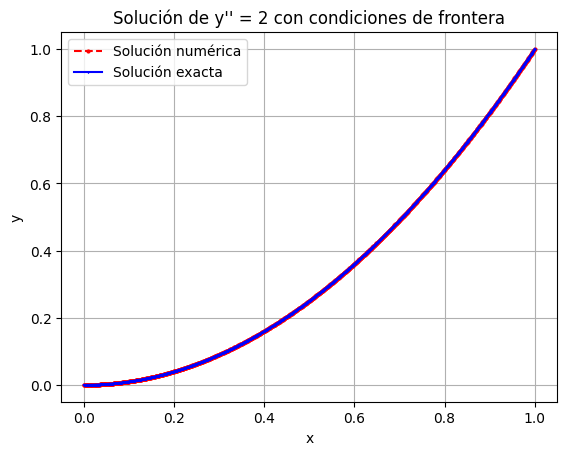

In [29]:
# Solución exacta para comparar
y_exacta = x**2 + (1 - 1**2) * x  # ajustamos C1 y C2 para cumplir condiciones

# Graficar
plt.plot(x, y, label='Solución numérica', color="red", linestyle='--', marker='o', markersize=2)
plt.plot(x, y_exacta, label='Solución exacta', color="blue", linestyle='-', marker='x', markersize=1)
plt.legend()
plt.title('Solución de y\'\' = 2 con condiciones de frontera')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Función para resolver y graficar la EDO
def resolver_y_graficar(nNodos):
    # Parámetros del problema
    a = 0
    b = 1
    h = (b - a)/(nNodos - 1)

    # Vectores para x y f
    x = np.linspace(a, b, nNodos)
    y = np.zeros(nNodos)
    f = 2 * np.ones(nNodos)  # y'' = 2

    # Construir la matriz A del sistema lineal
    A = np.zeros((nNodos, nNodos))
    for i in range(1, nNodos - 1):
        A[i, i - 1] = 1 / h**2
        A[i, i]     = -2 / h**2
        A[i, i + 1] = 1 / h**2

    # Condiciones de frontera
    A[0, 0] = 1
    A[-1, -1] = 1
    f[0] = 0     # y(0) = 0
    f[-1] = 1    # y(1) = 1

    # Resolver el sistema
    y = np.linalg.solve(A, f)

    # Solución exacta
    y_exacta = x**2 + (1 - 1**2) * x

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label='Solución numérica', color="red", linestyle='--', marker='o')
    plt.plot(x, y_exacta, label='Solución exacta', color="black", linestyle='-', marker='^')
    plt.legend()
    plt.title(f'Solución de y\'\' = 2 con {nNodos} nodos')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Widget para elegir número de nodos
slider_nodos = widgets.IntSlider(value=10, min=5, max=100, step=1, description='nNodos:')
widgets.interact(resolver_y_graficar, nNodos=slider_nodos)


interactive(children=(IntSlider(value=10, description='nNodos:', min=5), Output()), _dom_classes=('widget-inte…

<function __main__.resolver_y_graficar(nNodos)>